[Guide](https://machinelearningmastery.com/gentle-introduction-random-walk-times-series-forecasting-python/)

In [1]:
# import matplotlib
import matplotlib.pyplot as plt

#import random
import random

# set random seed
random.seed(5)

* generate NON stationary time-series

In [2]:
non_stat = list()
non_stat.append(-1 if random.random() < 0.5 else 2)
for i in range(100):
    movement = -1 if random.random() < 0.5 else 2
    value = non_stat[i-1] + movement
    non_stat.append(value)

* plot NON stationary series generated above

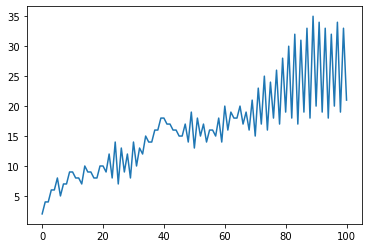

In [3]:
plt.plot(non_stat)
plt.show()

* generate stationary time-series

In [4]:
stat = [random.randrange(10) for i in range(50)] 

* plot stationary series generated above

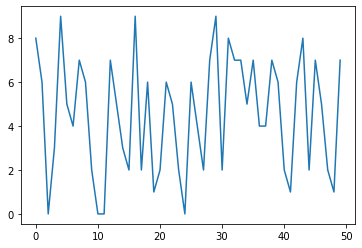

In [5]:
plt.plot(stat)
plt.show()

* Create function 'ADF_Stationarity_Test' with input parameters `timeseries` and `significance_level` which: 
    * prints adfuller test results
    * prints the conclusion stating whether timeseries is stationary based on the siginificance level (input parameter of function)


In [6]:
def ADF_Stationarity_Test(timeseries, significance_level=0.05):
    from statsmodels.tsa.stattools import adfuller
#     X = timeseries.values
    result = adfuller(timeseries)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    
    if result[1] >= significance_level:
        print(f'Data is not stationary: p-value({result[1]}) >= {significance_level}')
    else:
        print(f'Data is stationary: p-value({result[1]}) < {significance_level}')

* Apply function 'ADF_Stationarity_Test' to find out whether timeseries generated above are stationary.

In [7]:
ADF_Stationarity_Test(stat)

ADF Statistic: -2.661912324942845
p-value: 0.08086415253890789
Data is not stationary: p-value(0.08086415253890789) >= 0.05


In [8]:
ADF_Stationarity_Test(non_stat)

ADF Statistic: -1.2089526764711396
p-value: 0.6697326880633444
Data is not stationary: p-value(0.6697326880633444) >= 0.05


* Apply suitable transformation to make NON stationary time series stationary

In [9]:
# log transformation on time series

import numpy as np
log_non_stat = np.log(non_stat)

* plot transformed time series

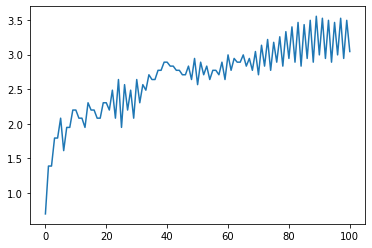

In [10]:
plt.plot(log_non_stat)

* Apply function 'ADF_Stationarity_Test' to find out whether transformed timeseries is stationary.

In [11]:
ADF_Stationarity_Test(log_non_stat)

ADF Statistic: -2.6366255165067667
p-value: 0.08566128345991786
Data is not stationary: p-value(0.08566128345991786) >= 0.05
